### Student Information
Name: Fernando Vielman

Student ID: 114065423

GitHub ID: 232552840

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') 
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer
import plotly as px
import math

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ferchis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ferchis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
#Importing the library
reddit_csv = "newdataset\Reddit-stock-sentiment.csv"
reddit_DF_csv = pd.read_csv(reddit_csv)

#Exercise 1 
print("This is exercise 1: " "\n")

for t in range(3):  
    print(f"Example {t+1}")
    print(reddit_DF_csv.loc[t]) 
    print("-" * 80)  # Separate each example


This is exercise 1: 

Example 1
type                                                    comment
datetime                                    2025-04-11 17:29:56
post_id                                                 mmli62w
subreddit                                        wallstreetbets
title           Retardation is on the menu boys! WSB is so back
author                                             StickyTip420
url                        https://i.redd.it/0yq2ftren8ue1.jpeg
upvotes                                                       0
downvotes                                                   NaN
upvote_ratio                                                NaN
text                                           Calls on retards
subjectivity                                                1.0
polarity                                                   -0.9
sentiment                                                  -1.0
entities                                                     []
label   

In [3]:
 #Converting dictionary into panda dataframe

reddit_DF = pd.DataFrame(reddit_DF_csv['type'], columns=['type'])

#Adding the relevant columns. Columns not included, such as author, were not added because I thought they were irrelevant. Reasoning below.

reddit_DF['text'] = reddit_DF_csv['text']
reddit_DF['subjectivity'] = reddit_DF_csv['subjectivity']
reddit_DF['polarity'] = reddit_DF_csv['polarity']
reddit_DF['sentiment'] = reddit_DF_csv['sentiment']
reddit_DF['label'] = reddit_DF_csv['label']

# Not included columns: datetime, post_id, subreddit, title, author, url, upvotes, downvotes, upvote_ratio, entities. All of them are either irrelevant, reduntant, or would just 
# bloat the dataframe. For example, author would bloat the dataframe since each post/comment should have different authors.

#Testing it works on the first 10 
reddit_DF[0:10]

,type,text,subjectivity,polarity,sentiment,label
0,comment,Calls on retards,1.000000,-0.900000,-1.0,-1.0
1,comment,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,0.0
2,comment,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,0.0
3,post,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0
4,comment,He didn’t say thank you.,0.000000,0.000000,0.0,-1.0
5,comment,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,0.0
6,comment,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,-1.0
7,comment,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,0.0
8,comment,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,1.0
9,comment,HLGN is $10. Hurry and catch it now before it ...,0.000000,0.000000,0.0,1.0


In [4]:
#Added a new column called 'sentiment_name' because it is clearer to refer to a comment/post as 'positive' than '1'.

sentiment_map = {
    1: 'positive',
    0: 'neutral',
   -1: 'negative'
}
reddit_DF['sentiment_name'] = reddit_DF['sentiment'].map(sentiment_map)

reddit_DF[['sentiment', 'sentiment_name']].head()

,sentiment,sentiment_name
0,-1.0,negative
1,1.0,positive
2,0.0,neutral
3,1.0,positive
4,0.0,neutral


In [5]:
#Exercise 2

print("This is exercise 2: " "\n")

reddit_DF.query("type == 'post'")

#Decided to use .query since this method was not used to query on the master file. Only selected the 'post' types. 

This is exercise 2: 



,type,text,subjectivity,polarity,sentiment,label,sentiment_name
3,post,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0,positive
48,post,\r\n\r\n [MarketWatch: Stock Market News - Fi...,0.000000,0.000000,0.0,0.0,neutral
63,post,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,0.0,positive
70,post,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.000000,0.0,0.0,neutral
72,post,"A lot of stocks are down right now, and I'm th...",0.347959,0.005102,1.0,0.0,positive
...,...,...,...,...,...,...,...
783,post,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,0.0,neutral
786,post,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,0.0,neutral
802,post,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,0.0,neutral
836,post,how does the futures market look today\r\n\r\n...,0.377083,0.062500,1.0,0.0,positive


In [6]:
#Exercise 3

#Only change is that I chose fetch the records belonging to the post category. 

print("This is exercise 3: " "\n")

reddit_DF[reddit_DF["type"] == "post"][::10][0:5]

This is exercise 3: 



,type,text,subjectivity,polarity,sentiment,label,sentiment_name
3,post,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,1.0,positive
165,post,Stock list generated from technical Analysis. ...,0.10000,0.000000,0.0,0.0,neutral
332,post,"Mostly in MSTR calls, AAPL puts and GBTC long.",0.45000,0.225000,1.0,1.0,positive
421,post,Stocks that are trending up today\r\n\r\n [Pop...,0.00000,0.000000,0.0,0.0,neutral
487,post,"Good Morning Investors, \r\n\r\nI am a young F...",0.41903,0.119152,1.0,0.0,positive


In [7]:
#Checking if there is any missing value

import helpers.data_mining_helpers as dmh

reddit_DF.isnull().apply(lambda reddit_DF: dmh.check_missing_values(reddit_DF))

#No missing values on this dataframe. 


,type,text,subjectivity,polarity,sentiment,label,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0


In [8]:
#Exercise 4

print("This is exercise 4: " "\n")

reddit_DF.isnull().apply(lambda reddit_DF: dmh.check_missing_values(reddit_DF), axis = 1)


This is exercise 4: 



0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [9]:
reddit_DF.dropna(inplace=True) #Adding a way to remove the missing values. Even if the file does not have any, its good to future proof.

print("There are now:" , sum(reddit_DF.duplicated()), "duplicates in this dataframe") #Right now there are 23 duplicated values. 

reddit_DF.drop_duplicates(keep=False, inplace=True)

print("There are now:" , sum(reddit_DF.duplicated()), "duplicates in this dataframe") #Now there are none.



There are now: 23 duplicates in this dataframe
There are now: 0 duplicates in this dataframe


<Axes: title={'center': 'Sentiment distribution of the entire dataframe'}, xlabel='sentiment_name'>

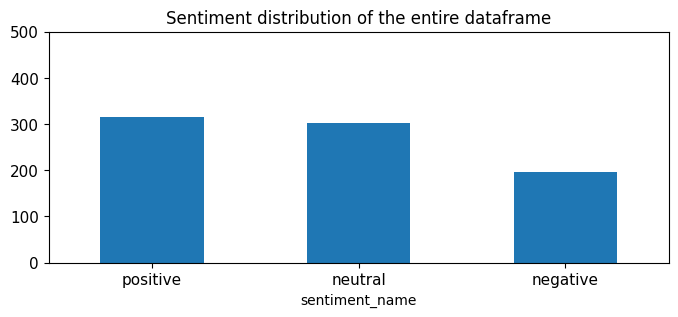

In [10]:
#Sampling due to the density of the 'text' records.

len(reddit_DF) #Exactly 813 records. 

reddit_DF_sample = reddit_DF.sample(n=400) #Picked 400 because its about half. 

import matplotlib.pyplot as plt

#Ploting the entire dataframe

reddit_DF.sentiment_name.value_counts().plot(kind = 'bar', #Chose a bar-graph to show the difference in the records between the amount of positive, neutral, and negative sentiments. 
                                    title = 'Sentiment distribution of the entire dataframe',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))



<Axes: title={'center': 'Sentiment distribution of the entire dataframe'}, xlabel='sentiment_name'>

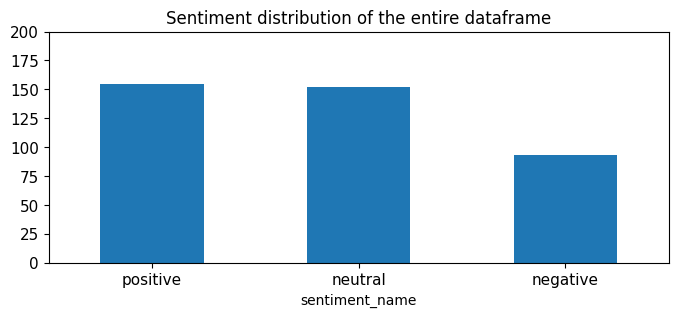

In [11]:
#Ploting the sample dataframe. Did it on a separate code cell so I could display both graphs.

reddit_DF_sample.sentiment_name.value_counts().plot(kind = 'bar', 
                                    title = 'Sentiment distribution of the entire dataframe',
                                    ylim = [0, 200],        
                                    rot = 0, fontsize = 11, figsize = (8,3))


This is exercise 7: 



<Axes: title={'center': 'Sentiment distribution of the entire dataframe'}, xlabel='sentiment_name'>

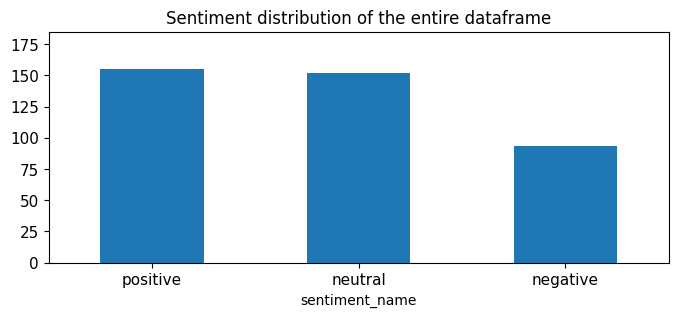

In [12]:
#Exercise 7, skipped 5 and 6 because they were unnecesary. 

print("This is exercise 7: " "\n")

reddit_DF_sample.sentiment_name.value_counts().plot(kind = 'bar', 
                                    title = 'Sentiment distribution of the entire dataframe',
                                    ylim = [0, reddit_DF_sample.sentiment_name.value_counts().max()+30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

This is exercise 8: 



<Axes: title={'center': 'Category Distribution Comparison'}, xlabel='sentiment_name'>

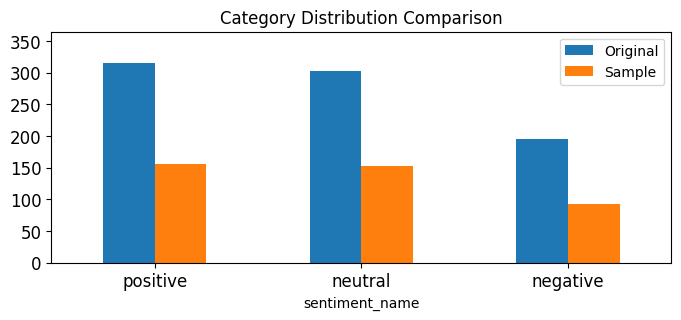

In [13]:
#Exercise 8 

print("This is exercise 8: " "\n")


all_vs_sample = (pd.DataFrame({
    'Original': reddit_DF.sentiment_name.value_counts(), 
    'Sample': reddit_DF_sample.sentiment_name.value_counts()})
)

all_vs_sample.plot(kind='bar',
                   title= "Category Distribution Comparison" ,
                   ylim= [0, reddit_DF.sentiment_name.value_counts().max()+50], # I use the original size since its going to have a larger data set. 
                   rot = 0, fontsize = 12, figsize = (8,3)
)

In [14]:
reddit_DF['unigrams'] = reddit_DF['text'].apply(lambda x: dmh.tokenize_text(x)) #Convert all the text column into unigrams/tokens. This is a step in order to create a document term-matrix. 
reddit_DF[0:4]  # Check the new column created with all the unigrams from all the text per line. 

,type,text,subjectivity,polarity,sentiment,label,sentiment_name,unigrams
0,comment,Calls on retards,1.000000,-0.900000,-1.0,-1.0,negative,"[Calls, on, retards]"
1,comment,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,0.0,positive,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
reddit_DF_Vectorizer = count_vect.fit_transform(reddit_DF.text) 
print(reddit_DF_Vectorizer[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [16]:
count_vect.get_feature_names_out()[0:25] #Just testing how the array looks.

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100',
       '1000', '10000', '100k', '100x', '10k', '10ks', '10yr', '11',
       '116', '118', '12', '1242', '125', '12855584', '13'], dtype=object)

In [17]:
# Exercise 9

print("This is exercise 9: " "\n")

analyze = count_vect.build_analyzer()
analyze(reddit_DF.text[0])

This is exercise 9: 



['calls', 'on', 'retards']

In [18]:
reddit_DF_Vectorizer[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [19]:
# Exercise 10
# Since there is not a 1 on this array, I will be looking into the 3 that appears on the 4th record. 
print("This is exercise 10: " "\n")

print(count_vect.get_feature_names_out()[19:20])

This is exercise 10: 

['118']


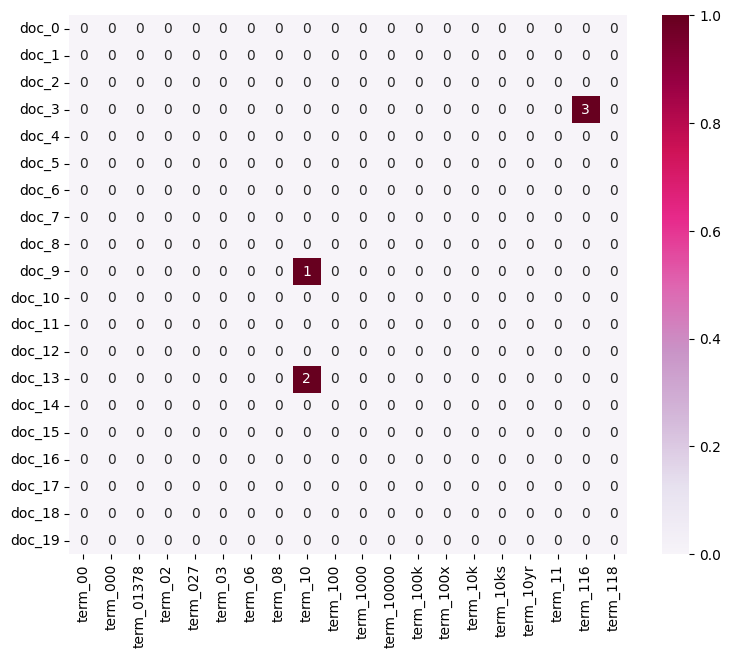

In [20]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]] #Chose 20 because its the same as the Master file. 
plot_y = ["doc_"+ str(i) for i in list(reddit_DF.index)[0:20]]
plot_z = reddit_DF_Vectorizer[0:20, 0:20].toarray() 

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# This heatmap does not have a lot of information and is very abstract, next exercise it will improve. 

This is exercise 11: 



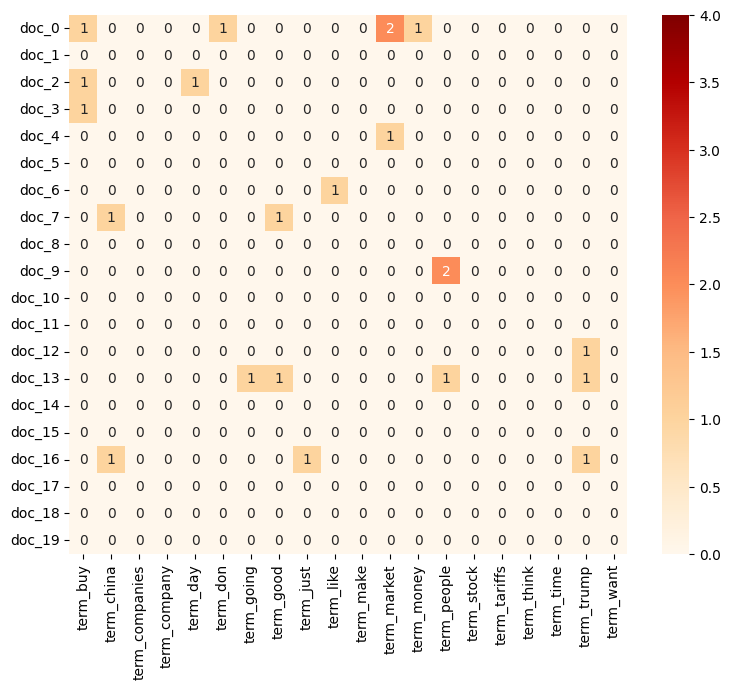

In [21]:
# Exercise 11

print("This is exercise 11: " "\n")

count_vect_heatmap = CountVectorizer(
    max_features= 20,            #Using the top 20 terms that are most frequent in the data
    stop_words= 'english',      #Removing all stops words from the english language, only having words that are relevant
) 
reddit_DF_sample_heatmap = count_vect_heatmap.fit_transform(reddit_DF_sample.text) #Only taking account the sample size, since its smaller its faster to compute

plot_x_heatmap = ["term_"+str(i) for i in count_vect_heatmap.get_feature_names_out()[0:20]] 
plot_y_heatmap = ["doc_"+ str(i) for i in list(reddit_DF.index)[0:20]]
plot_z_heatmap = reddit_DF_sample_heatmap[0:20].toarray() 


df_todraw = pd.DataFrame(plot_z_heatmap, columns =
plot_x_heatmap, index = plot_y_heatmap)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="OrRd", 
                 vmin=0, vmax=4, annot=True) 

# Now we can see what the heatmap is more useful, only showing the most frequent 20 terms in the first 20 documents. 



C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\3287195795.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


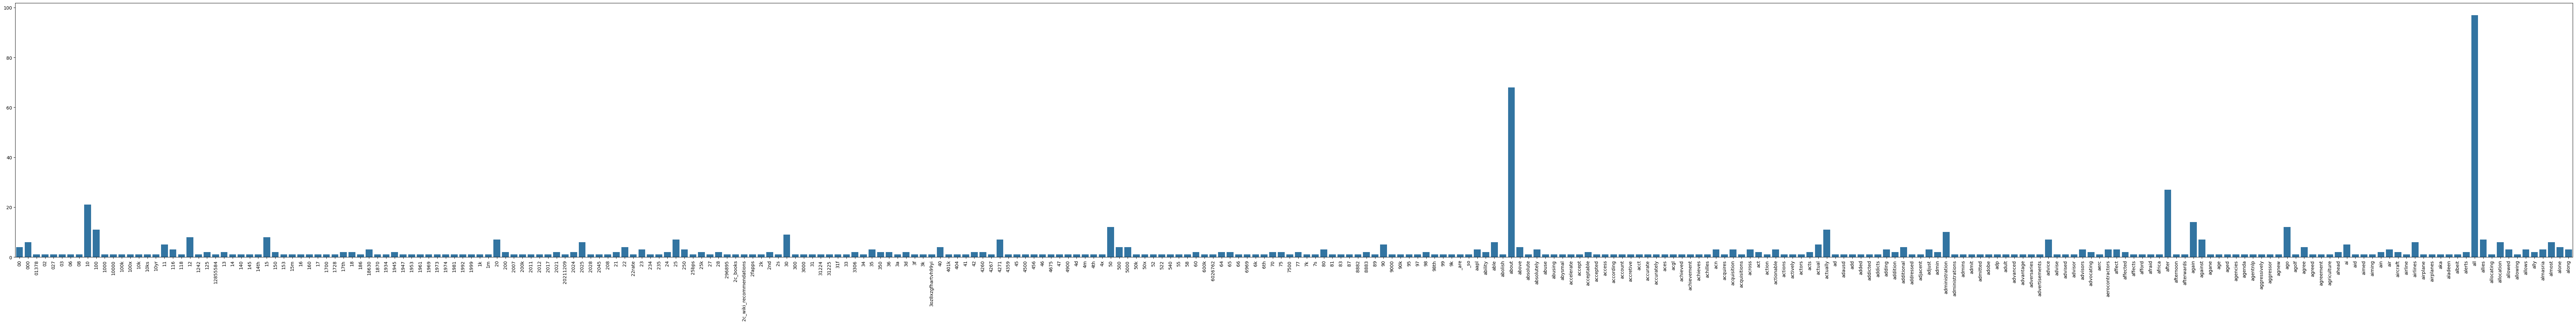

In [22]:
term_frequencies = []
for j in range(0,reddit_DF_Vectorizer.shape[1]):
    term_frequencies.append(sum(reddit_DF_Vectorizer[:,j].toarray()))

term_frequencies = np.asarray(reddit_DF_Vectorizer.sum(axis=0))[0]

term_frequencies[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [23]:
# Exercise 12

print("This is exercise 12: " "\n")

import plotly.express as px #Normal plotly was not running.

bar = pd.DataFrame({
    "Term": ["term_"+str(i) for i in count_vect.get_feature_names_out()[:300]] ,
    "Frequency": term_frequencies[:300]
})

fig = px.bar(
    bar, 
    x="Term", 
    y="Frequency", 
    title="First 300 Term Frequencies",
    width=3000,   
    height=1000
)

fig.show()

This is exercise 12: 



This is exercise 13: 



C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\3449743787.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\3449743787.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



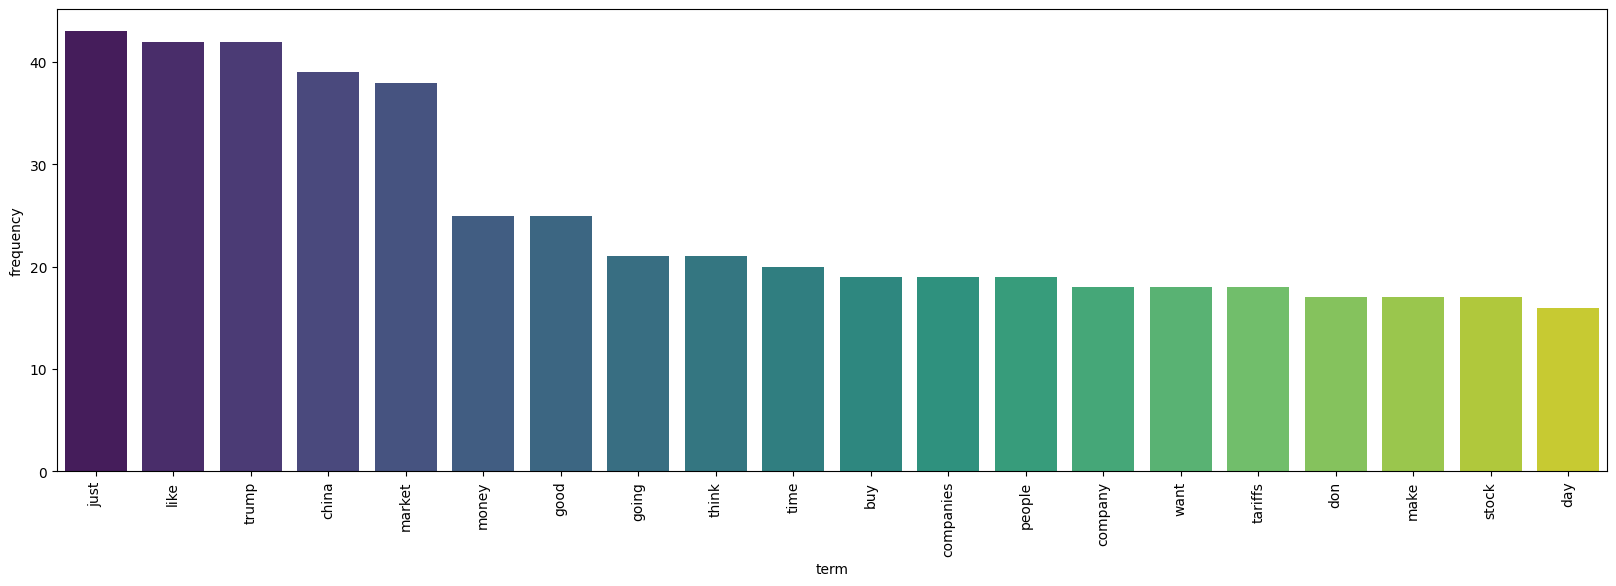

In [24]:
# Exercise 13

print("This is exercise 13: " "\n")

term_frequencies_reddit = np.asarray(reddit_DF_sample_heatmap.sum(axis=0))[0]

terms = count_vect_heatmap.get_feature_names_out()

DF_test = pd.DataFrame({
    "term": terms,
    "frequency": term_frequencies_reddit
})

DF_test = DF_test.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(
    data=DF_test, 
    x="term", 
    y="frequency" ,
    palette="viridis"
).set_xticklabels(DF_test["term"], rotation=90)
plt.show()



This is exercise 14: 



C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\1175752387.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\1175752387.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



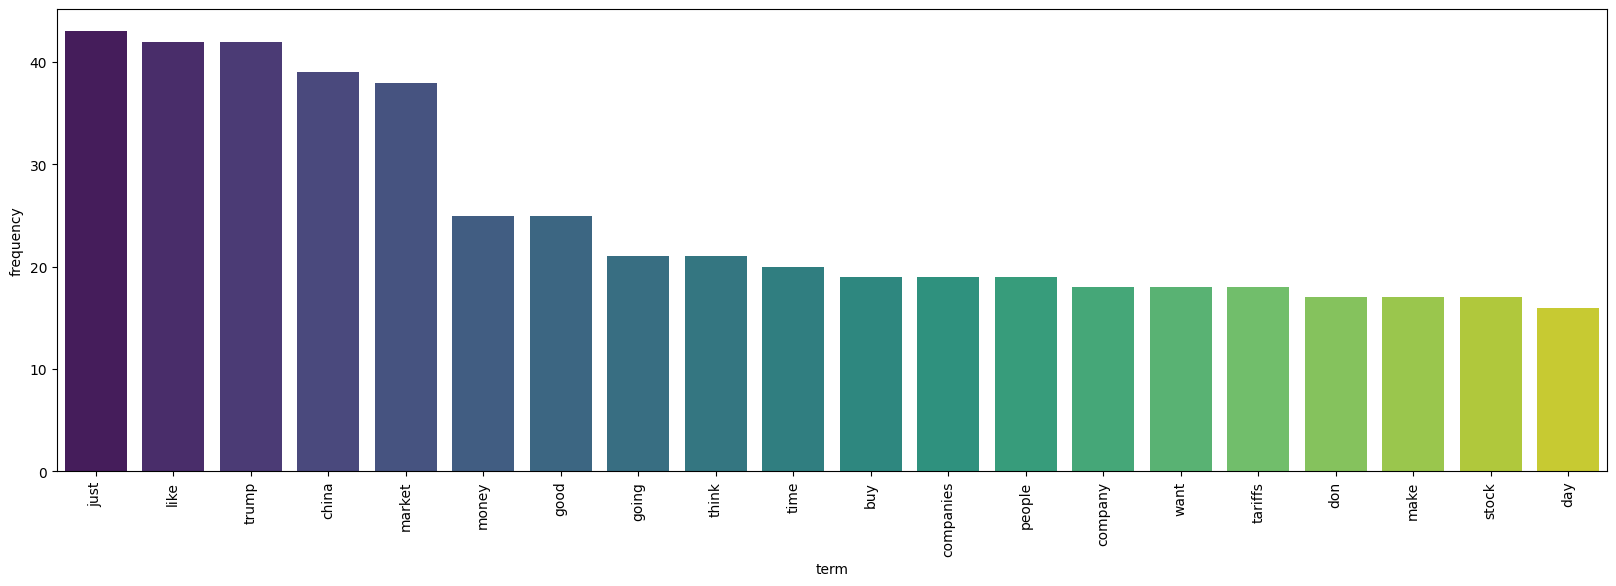

In [25]:
# Exercise 14

print("This is exercise 14: " "\n")

term_frequencies_test = np.asarray(reddit_DF_sample_heatmap.sum(axis=0))[0]

terms = count_vect_heatmap.get_feature_names_out()

DF_test = pd.DataFrame({
    "term": terms,
    "frequency": term_frequencies_test
})

DF_test = DF_test.sort_values(by="frequency", ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(
    data=DF_test, 
    x="term", 
    y="frequency" ,
    palette="viridis"
).set_xticklabels(DF_test["term"], rotation=90)
plt.show()

In [26]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]


bar = pd.DataFrame({
    "Term": ["term_"+str(i) for i in count_vect.get_feature_names_out()[:300]] ,
    "Frequency": term_frequencies_log[:300]
})

fig = px.bar(
    bar, 
    x="Term", 
    y="Frequency", 
    title="First 300 Term Frequencies",
    width=3000,   
    height=1000
)

fig.show()

#With the logarithm graphic we can see the terms that do not apport any significant data since their value is 0.

In [27]:
# Part 3 // New visualizations start here

reddit_DF_SentVsLabel = reddit_DF.melt( #I used the .melt function to be able to make the histogram easily. The .melt makes it so a new table gets created, with 2 columns, which are defined below.
    value_vars=["label", "sentiment"], 
    var_name="Metric", # The 'Metric' in this case will pull whether the value is a Label or Sentiment. 
    value_name="Value" # This one reflects the actual amount of the value, in this case since our values are only -1, 0, or 1.
)

fig = px.histogram(
    reddit_DF_SentVsLabel,
    x="Value",
    color="Metric",     
    barmode="group",   
    title="Histogram: Label vs Sentiment",
    width=1000,
    height=600
)

fig.show()

# I made this graph because I thought it would be interesting seeing the difference between the columns Label and Sentiment since at first glance they look identical. 

# It is interresting how the 'label' column in the data set, marks some posts/comments as negative or neutral when the 'sentiment' column marks them as positive. 
# 'Label' seems less likely to assign a positive value to the posts/comments. Keyword being "seems"

In [28]:
# I just wanted to organize the log graph in a descending manner, and remove the ones that didnt have any frequency.

#Making a new Vectorizer

count_vect_log  = CountVectorizer(
    max_features= 300,           
    stop_words= 'english',      
) 
reddit_DF_log = count_vect_log.fit_transform(reddit_DF.text)


# Making the new frequencies for the new array

frequencies_reddit_log = np.array(reddit_DF_log.sum(axis=0)).flatten()
terms_reddit_log = np.array(count_vect_log.get_feature_names_out())

top_indices = np.argsort(frequencies_reddit_log)[::-1] #Making it descending.

top_indices = top_indices[:300]

# Making the logarithm

bar = pd.DataFrame({
    "Term": terms_reddit_log[top_indices],
    "Frequency": [math.log(f) for f in frequencies_reddit_log[top_indices] if f > 0]  # f > 0 to remove data records that were 0.
})

# Creating the graph
fig = px.bar(
    bar,
    x="Term",
    y="Frequency",
    title="Top 300 Term Frequencies",
    width=3000,
    height=1000
)

fig.show()


# Phase 2

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category. The category to use is 'sentiment_name'
categories = reddit_DF['sentiment_name'].unique()  
category_dfs = {}  

for category in categories:
    category_dfs[category] = reddit_DF[reddit_DF['sentiment_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  
    reddit_counts = count_vect.fit_transform(df['text'])  

    words = count_vect.get_feature_names_out()
    
    reddit_term_document_df = pd.DataFrame(reddit_counts.toarray(), columns=words)
    
    return reddit_term_document_df

# Create term-document frequency DataFrames for each category
filt_reddit_term_document_dfs = {}  

for category in categories:
    filt_reddit_term_document_dfs[category] = create_term_document_df(category_dfs[category])

category_number=2 #You can change it from 0 to 2. 0 = negative, 1 = postive, 2 = neutral
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {categories[category_number]}:")
filt_reddit_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Sentiment neutral:


,00,000,02,03,10,100,10yr,11,12,1242,...,year,years,yes,yesterday,yet,yields,yo,you,your,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


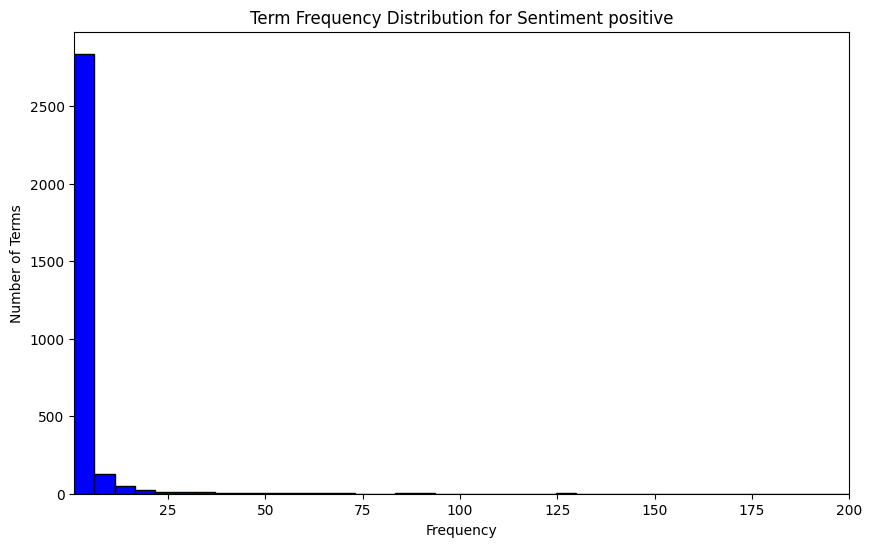

In [30]:

category_number= 1 #You can change it from 0 to 2. 0 = negative, 1 = postive, 2 = neutral
word_counts_reddit = filt_reddit_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution. Please note that the first column is very tall. If the category number is 0 then the value its above 1200.
plt.figure(figsize=(10, 6))
plt.hist(word_counts_reddit, bins=100, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [31]:
category_number= 2 #You can change it from 0 to 2. 0 = negative, 1 = postive, 2 = neutral
word_counts = filt_reddit_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  
sorted_counts = np.sort(word_counts)[::-1]  

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_reddit_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Sentiment: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Sentiment: neutral
Number of terms in top 5%: 62
Filtered terms: ['the', 'to', 'is', 'it', 'and', 'of', 'you', 'in', 'for', 'that', 'on', 'this', 'they', 'are', 'he', 'what', 'just', 'market', 'will', 'can', 'if', 'not', 'up', 'be', 'my', 'at', 'or', 'about', 'so', 'as', 'was', 'have', 'trump', 'no', 'with', 'all', 'we', 'how', 'them', 'from', 'get', 'x200b', 'has', 'going', 'do', 'like', 'your', 'china', 'any', 'one', 'over', 'should', 'day', 'after', 'but', 'don', 'still', 'more', 'us', 'now', 'go', 'there']


In [32]:
category_number=2 #You can change it from 0 to 2. 0 = negative, 1 = postive, 2 = neutral
word_counts = filt_reddit_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  
sorted_counts = word_counts[sorted_indices]  

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_reddit_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Sentiment: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Sentiment: neutral
Number of terms in bottom 1%: 12
Filtered terms: ['3oz8xzgfhartvh99yi', '40', '41', 'weakness', 'wears', 'wednesday', 'world', 'worry', '500', '60', '6026762', '65']


In [33]:


# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):

    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor sentiment {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_reddit_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For sentiment negative we filter the following words:
Bottom 1.0% words: 
absolutely     1
abusing        1
willingly      1
willingness    1
windows        1
whether        1
whilst         1
wholesale      1
acts           1
actual         1
addicted       1
addicts        1
adjust         1
admin          1
abolish        1
above          1
dtype: int64
Top 5.0% words: 
our          9
economy      9
want         9
too          9
some         9
          ... 
it          99
is         113
and        121
to         144
the        234
Length: 81, dtype: int64

For sentiment positive we filter the following words:
Bottom 1.0% words: 
zgld                       1
33                         1
places                     1
34                         1
wing                       1
winners                    1
wins                       1
petrotal                   1
pfs                        1
28                         1
2c_books                   1
2c_wiki_recommendations    1
2fapps    

,00,000,02,03,10,100,10yr,11,12,1242,...,yamana,yeah,year,years,yes,yesterday,yet,yields,yo,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Exercise 16

On the bottom 1%, positive has significantly more words than negative or neutral. Positive has 31 terms, while negative has 16 and neutral has 12. The top 5% also reflect this, positive has 155 terms, 62 neutral, and 81 negative. 

Many of the words on the top 5% were predictably similar alongside all of the sentiments. For example 'the', 'to', and 'is' show up in all sentiments. 

Predictably, the opposite is also true on the bottom 1%. These words only appear once in the sentiment, and they are very unique words. A lot of these are numbers, and are less likely that they will repeat in the sentiment. 

A quick observation, is that according to our graph that I previously made, it shows that there are around over 1000 terms that have a very low frequency. Meaning most words only appear once in the corpus. Indicating that these document may have a very high sparsity rate. 


In [35]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [36]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

Database size (total no of transactions) : 313
Number of items : 2922
Minimum Transaction Size : 1
Average Transaction Size : 16.345047923322685
Maximum Transaction Size : 196
Standard Deviation Transaction Size : 22.187894608777718
Variance in Transaction Sizes : 493.8805603342345
Sparsity : 0.9944062122096774


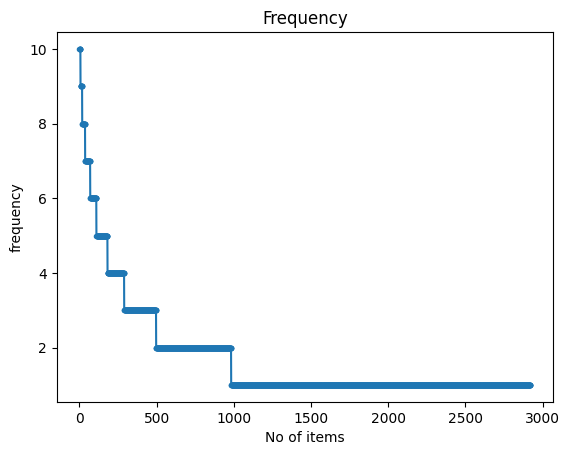

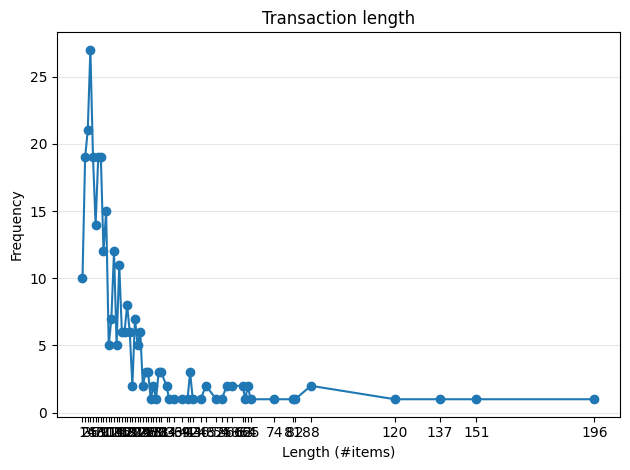

In [37]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 193
Number of items : 1531
Minimum Transaction Size : 1
Average Transaction Size : 13.05699481865285
Maximum Transaction Size : 65
Standard Deviation Transaction Size : 10.795406108221401
Variance in Transaction Sizes : 117.14777633851467
Sparsity : 0.9914715905821994


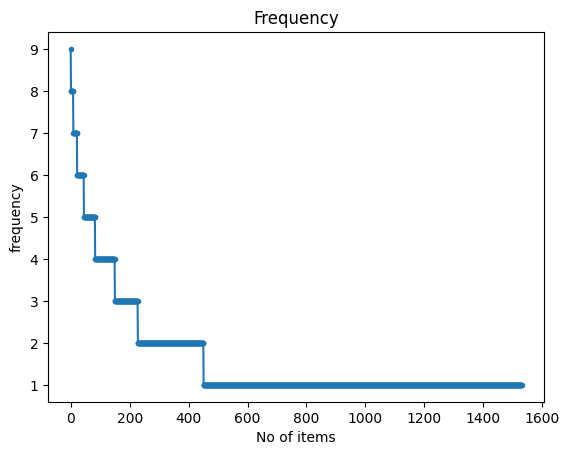

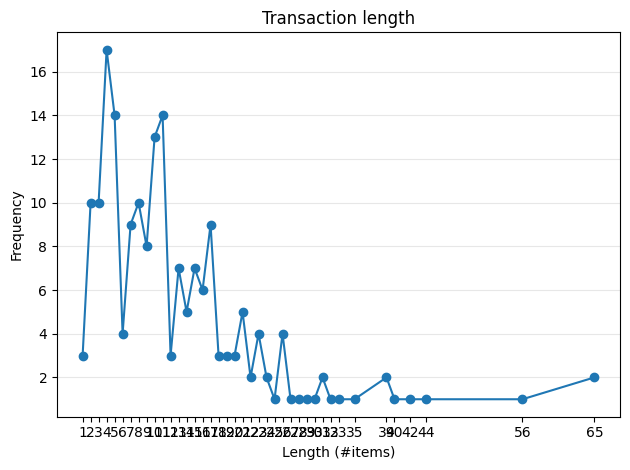

In [38]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 297
Number of items : 1166
Minimum Transaction Size : 1
Average Transaction Size : 5.973063973063973
Maximum Transaction Size : 31
Standard Deviation Transaction Size : 4.895467742390187
Variance in Transaction Sizes : 24.046569296569295
Sparsity : 0.9948773036251596


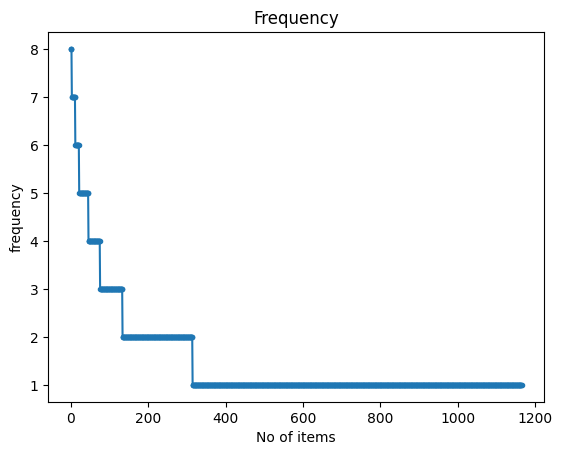

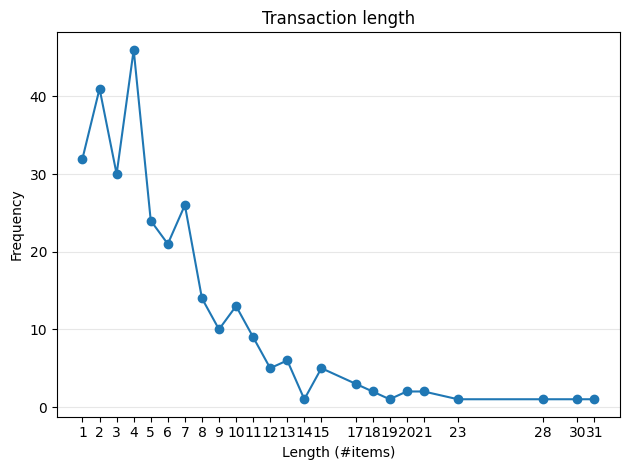

In [39]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [40]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9 #Chose minSup of 9 because thats what we have in the master file. This minSup is not good for this dataset, it provides too few patterns. 
obj1 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_positive= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 18
Runtime: 0.0019981861114501953


In [41]:
obj1.save('freq_patterns_postive_minSup9.txt') #save the patterns
frequentPatternsDF_positive

,Patterns,Support
0,already,9
1,american,9
2,which,9
3,lol,9
4,point,9
5,lmao,9
6,love,9
7,still,9
8,after,9
9,call,9


In [42]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 1
Runtime: 0.0005097389221191406


In [43]:
obj1.save('freq_patterns_negative_minSup9.txt') #save the patterns
frequentPatternsDF_negative

,Patterns,Support
0,time,9


In [44]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_neutral= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.004416465759277344


In [45]:
obj1.save('freq_patterns_neutral_minSup9.txt') #save the patterns
frequentPatternsDF_neutral

,Patterns,Support


In [46]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_positive, frequentPatternsDF_negative, frequentPatternsDF_neutral]


pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns Support
17  everyone      10
16    thanks      10
15   america      10
14     where      10
13   someone      10
12   country      10
11    pretty      10
0    already       9
10     great       9
9       call       9
1   american       9
8      after       9
7      still       9
6       love       9
5       lmao       9
4      point       9
3        lol       9
2      which       9
18      time       9
Number of patterns discarded: 0


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
reddit_DF_tdm = count_vect.fit_transform(reddit_DF['text'])  # reddit_DF['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
reddit_DF['tokenized_text'] = reddit_DF['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=reddit_DF.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = reddit_DF['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(reddit_DF_tdm.toarray(), columns=terms, index=reddit_DF.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,call,american,after,still,love,lmao,point,lol,which,time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Exercise 17

# FAE Top-100 Changed the values to 100 250 500 since Top-1000 was taking over 30 mins to compute

from PAMI.frequentPattern.topk import FAE  as alg

inputFile = 'td_freq_db_positive.csv' #Chose positive since thats the largest csv.
kCount_100=100  
seperator='\t'

obj_k100 = alg.FAE(iFile=inputFile, k=kCount_100, sep=seperator)    
obj_k100.mine()            

positive_FAE_k100= obj_k100.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(positive_FAE_k100))) 
print('Runtime: ' + str(obj_k100.getRuntime())) 

positive_FAE_k100

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.005274534225463867


,Patterns,Support
0,pretty,10
1,country,10
2,someone,10
3,where,10
4,america,10
...,...,...
95,today,6
96,true,6
97,wanted,6
98,news,6


In [49]:
# FAE Top-250

from PAMI.frequentPattern.topk import FAE  as alg
inputFile = 'td_freq_db_positive.csv'
kCount_250=250  
seperator='\t'

obj_k250 = alg.FAE(iFile=inputFile, k=kCount_250, sep=seperator)    
obj_k250.mine()            

comp_graphics_FAE_k250= obj_k250.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(comp_graphics_FAE_k250))) 
print('Runtime: ' + str(obj_k250.getRuntime())) 

comp_graphics_FAE_k250

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 250
Runtime: 0.005872249603271484


,Patterns,Support
0,pretty,10
1,country,10
2,someone,10
3,where,10
4,america,10
...,...,...
245,happy,4
246,care,4
247,live,4
248,needs,4


In [50]:
# FAE Top-500

from PAMI.frequentPattern.topk import FAE  as alg
inputFile = 'td_freq_db_positive.csv'
kCount_500=500  
seperator='\t'

obj_k500 = alg.FAE(iFile=inputFile, k=kCount_500, sep=seperator)    
obj_k500.mine()            

positive_FAE_k1500= obj_k500.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(positive_FAE_k1500))) 
print('Runtime: ' + str(obj_k500.getRuntime())) 

positive_FAE_k1500

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.05478644371032715


,Patterns,Support
0,pretty,10
1,country,10
2,someone,10
3,where,10
4,america,10
...,...,...
495,online,3
496,trying,3
497,rate,3
498,country based,3


In [51]:
# MaxFPGrowth 3 

import PAMI.extras.dbStats.TransactionalDatabase as stats
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg


inputFile = 'td_freq_db_positive.csv'
minimumSupportCount = 3

obj_MaxFPG3 = alg.MaxFPGrowth(iFile=inputFile, minSup=minimumSupportCount, sep='\t') 
obj_MaxFPG3.mine()          


positive_MaxFPG3= obj_MaxFPG3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(positive_MaxFPG3))) 
print('Runtime: ' + str(obj_MaxFPG3.getRuntime())) 

positive_MaxFPG3

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 470
Runtime: 0.010507822036743164


,Patterns,Support
0,rate,3
1,trying,3
2,online,3
3,jan,3
4,fall,3
...,...,...
465,lol,9
466,american,9
467,everyone,10
468,thanks,10


In [52]:
# MaxFPGrowth 6 

import PAMI.extras.dbStats.TransactionalDatabase as stats
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg


inputFile = 'td_freq_db_positive.csv'
minimumSupportCount = 6

obj_MaxFPG6 = alg.MaxFPGrowth(iFile=inputFile, minSup=minimumSupportCount, sep='\t') 
obj_MaxFPG6.mine()          


positive_MaxFPG6= obj_MaxFPG6.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(positive_MaxFPG6))) 
print('Runtime: ' + str(obj_MaxFPG6.getRuntime())) 

positive_MaxFPG6

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 110
Runtime: 0.002816438674926758


,Patterns,Support
0,few,6
1,during,6
2,share,6
3,work,6
4,enough,6
...,...,...
105,america,10
106,where,10
107,someone,10
108,country,10


In [53]:
# MaxFPGrowth 9

import PAMI.extras.dbStats.TransactionalDatabase as stats
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg


inputFile = 'td_freq_db_positive.csv'
minimumSupportCount = 9

obj_MaxFPG9 = alg.MaxFPGrowth(iFile=inputFile, minSup=minimumSupportCount, sep='\t') 
obj_MaxFPG9.mine()          


positive_MaxFPG9= obj_MaxFPG9.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(positive_MaxFPG9))) 
print('Runtime: ' + str(obj_MaxFPG9.getRuntime())) 

positive_MaxFPG9

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 18
Runtime: 0.003198862075805664


,Patterns,Support
0,great,9
1,call,9
2,after,9
3,still,9
4,love,9
5,lmao,9
6,point,9
7,lol,9
8,which,9
9,american,9


#### Similarities

Max FPG 9 made the same patterns than the first MaxFPG we did. 


#### Differences

While FAE top 500 had a short runtime, FAE top 1000 and 1500 was the opposite. MaxFPGrowth had less than a second of computing time. The reason for this long computing times may be because due to the low amount of patterns, so FAE top 1000 is mining a lot of small patterns with minimal support. Due to this, it is not recommended to use FAE top 1000 for this model.  

MaxFPGrowth and FAE top k generated more patterns than the original, the original only develop 19 patterns (just like MaxFPG 9) while the most patters made with maxfpg were 478.

The extra patterns lower MaxFPGrowth manage to mine have a lower support. MFG6 started mining at a support of 6 while MFG3 started mining at 3. 


In [55]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt


# Apply PCA, t-SNE, and UMAP to the data
reddit_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
reddit_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
reddit_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [56]:
reddit_pca_tdm.shape

(813, 2)

In [57]:
reddit_tsne_tdm.shape

(813, 2)

In [58]:
reddit_umap_tdm.shape

(813, 2)

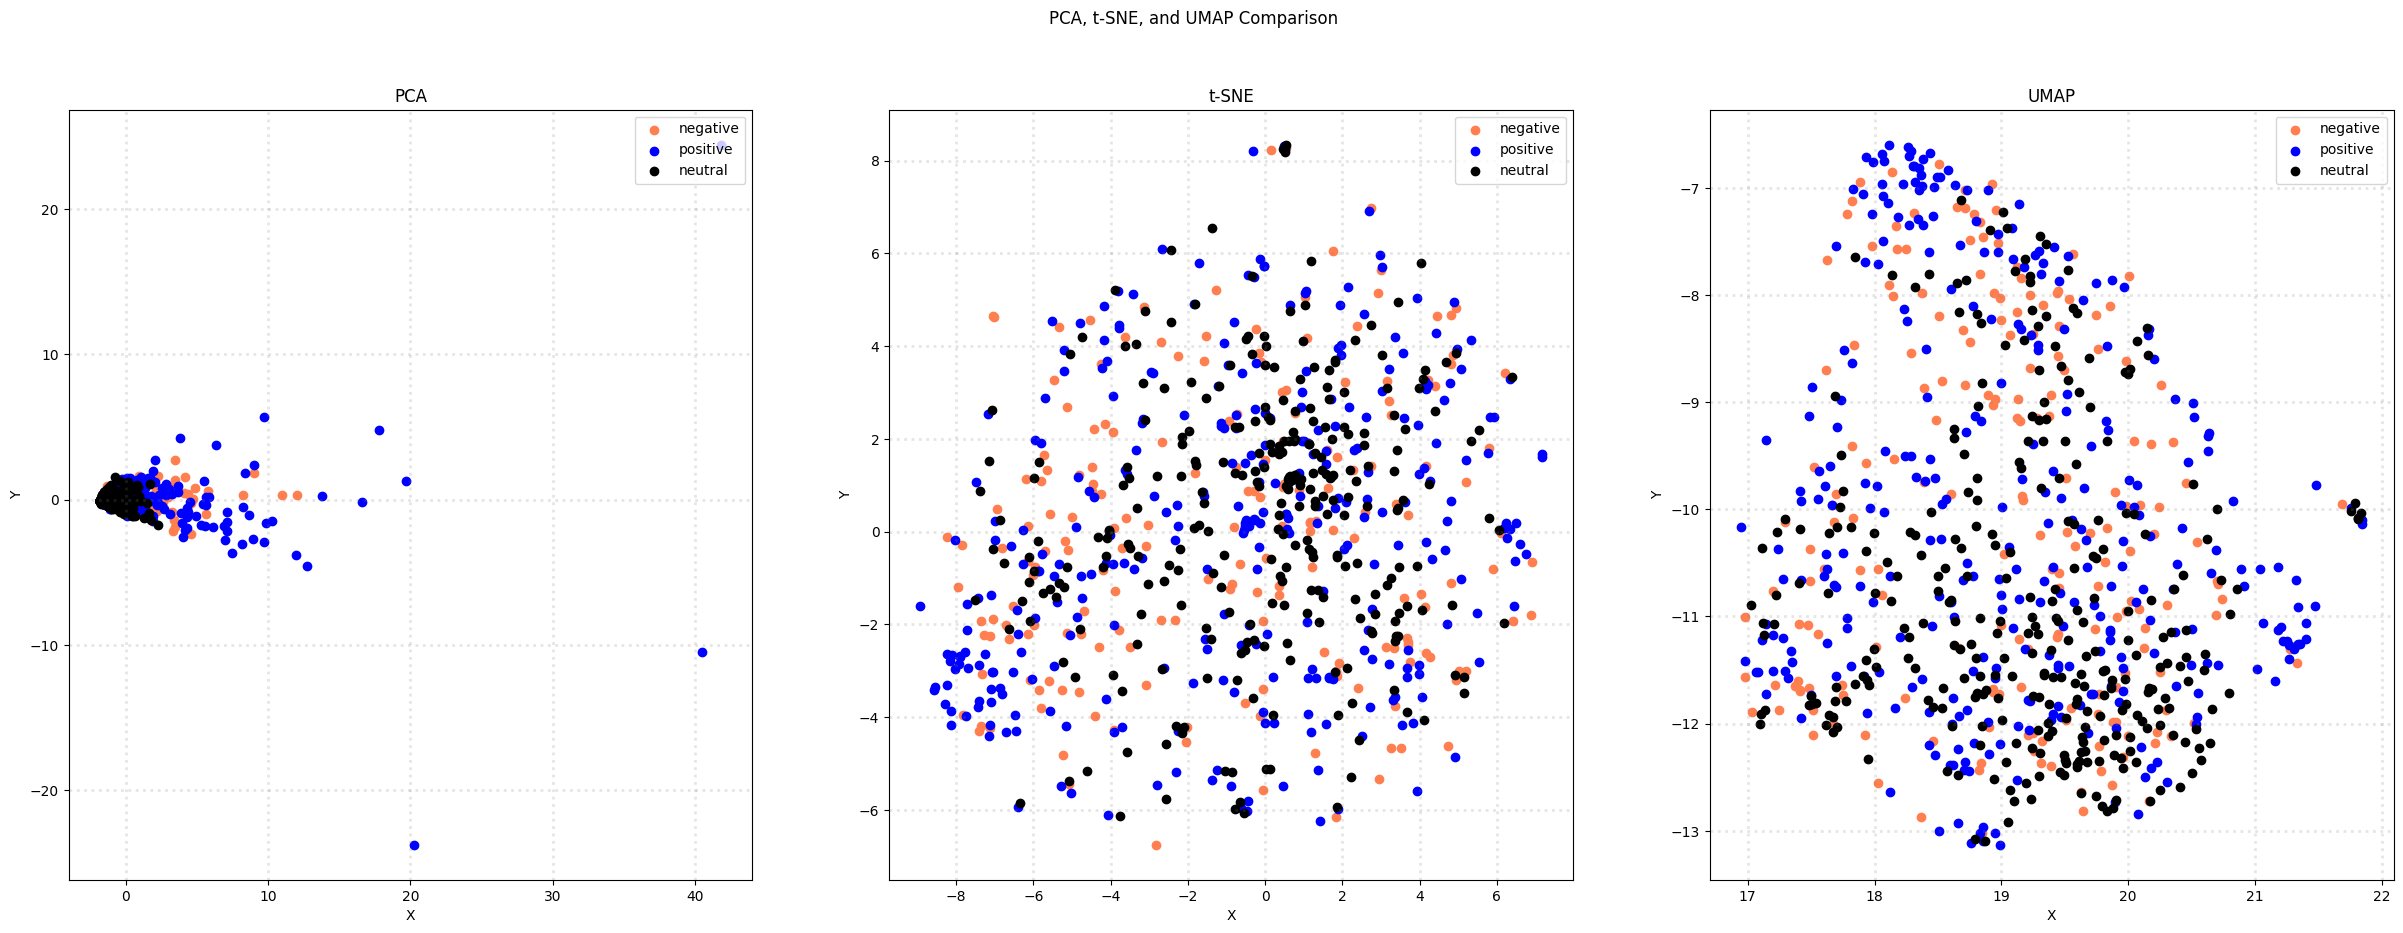

In [59]:
# Plot the (non-augmented) results in  2D scatter plots 
col = ['coral', 'blue', 'black', 'orange']
categories = reddit_DF['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, reddit_reduced, title):
    for c, category in zip(col, categories):
        xs = reddit_reduced[reddit_DF['sentiment_name'] == category].T[0]
        ys = reddit_reduced[reddit_DF['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

#Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], reddit_pca_tdm, 'PCA')
plot_scatter(axes[1], reddit_tsne_tdm, 't-SNE')
plot_scatter(axes[2], reddit_umap_tdm, 'UMAP')

plt.show()

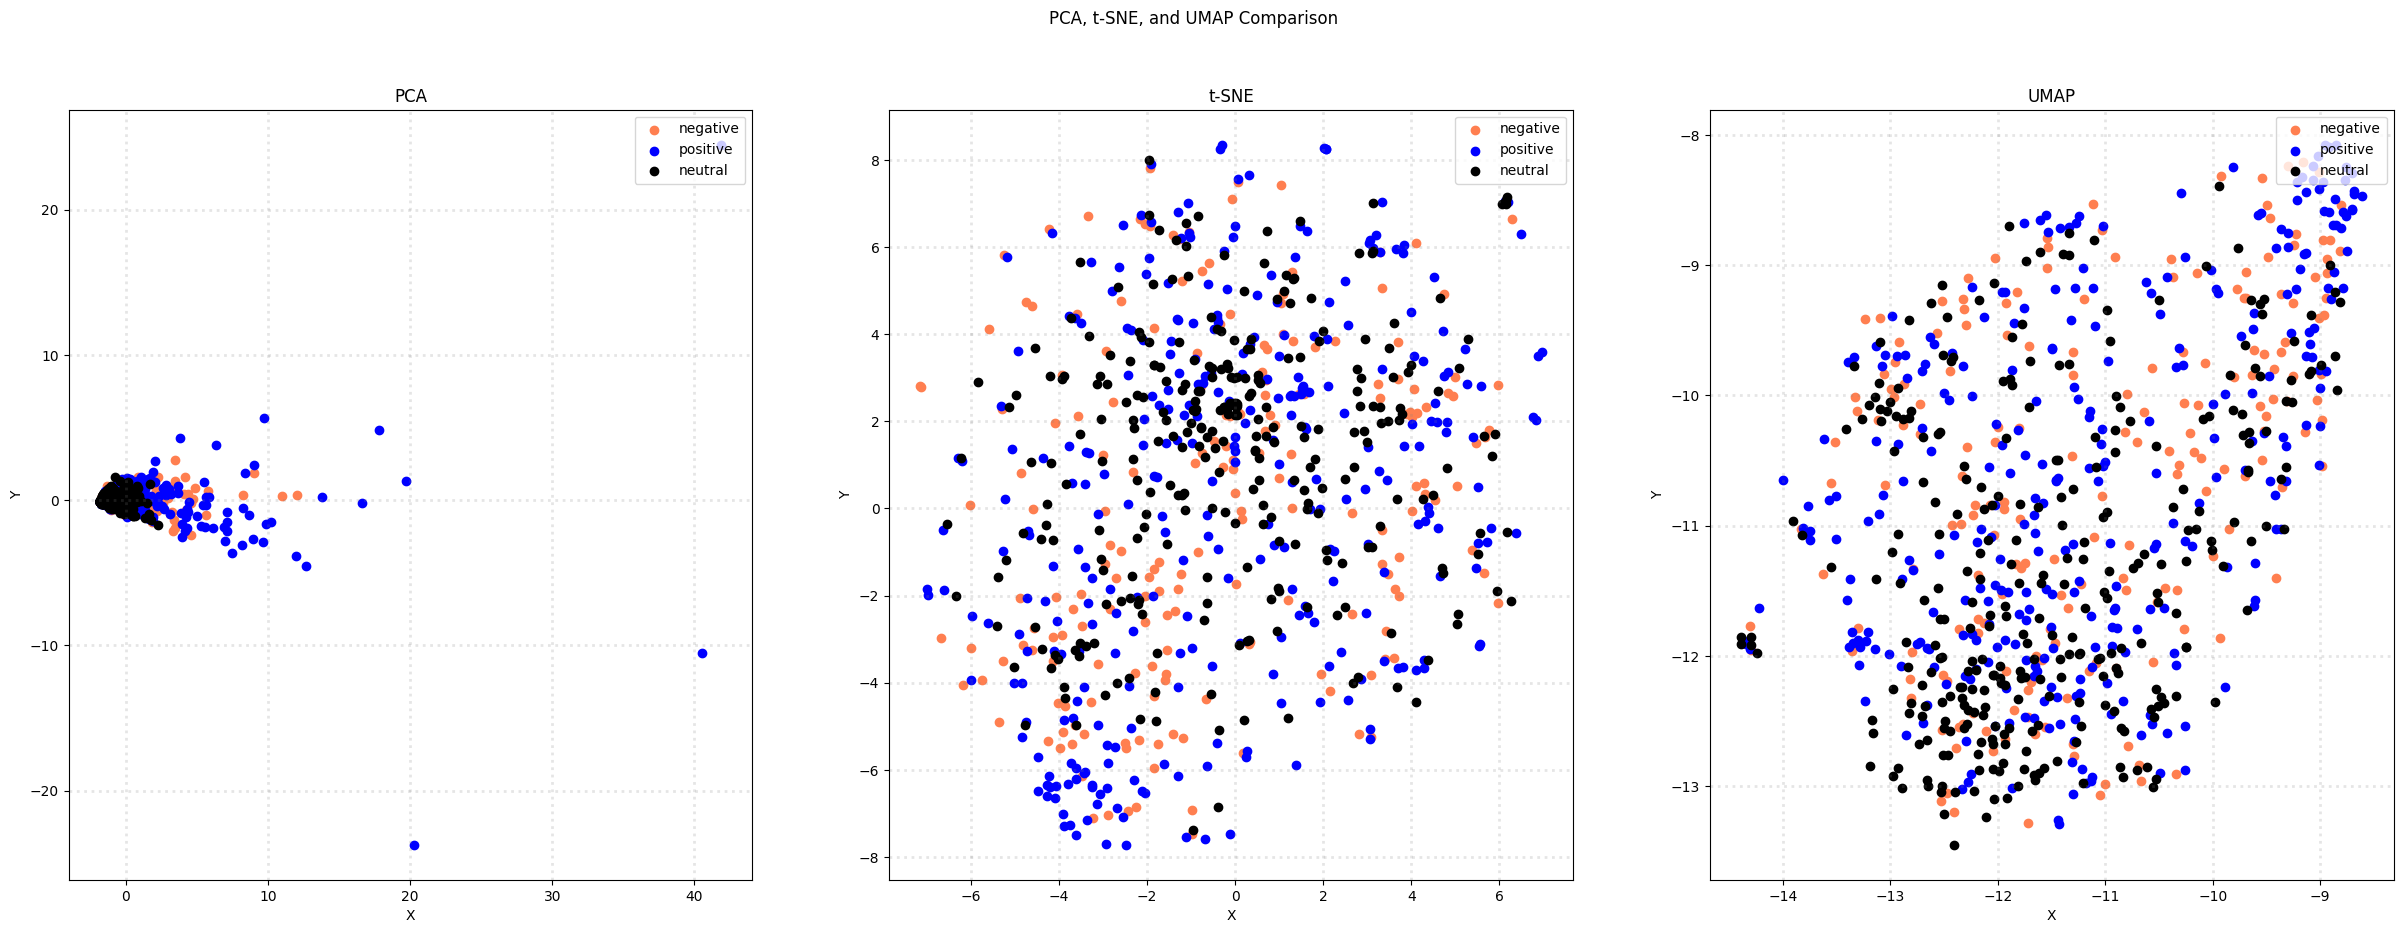

In [60]:
reddit_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
reddit_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
reddit_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

# Plot the (augmented) results in  2D scatter plots 
col = ['coral', 'blue', 'black', 'orange']
categories = reddit_DF['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, reddit_reduced, title):
    for c, category in zip(col, categories):
        xs = reddit_reduced[reddit_DF['sentiment_name'] == category].T[0]
        ys = reddit_reduced[reddit_DF['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

#Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], reddit_pca_aug, 'PCA')
plot_scatter(axes[1], reddit_tsne_aug, 't-SNE')
plot_scatter(axes[2], reddit_umap_aug, 'UMAP')


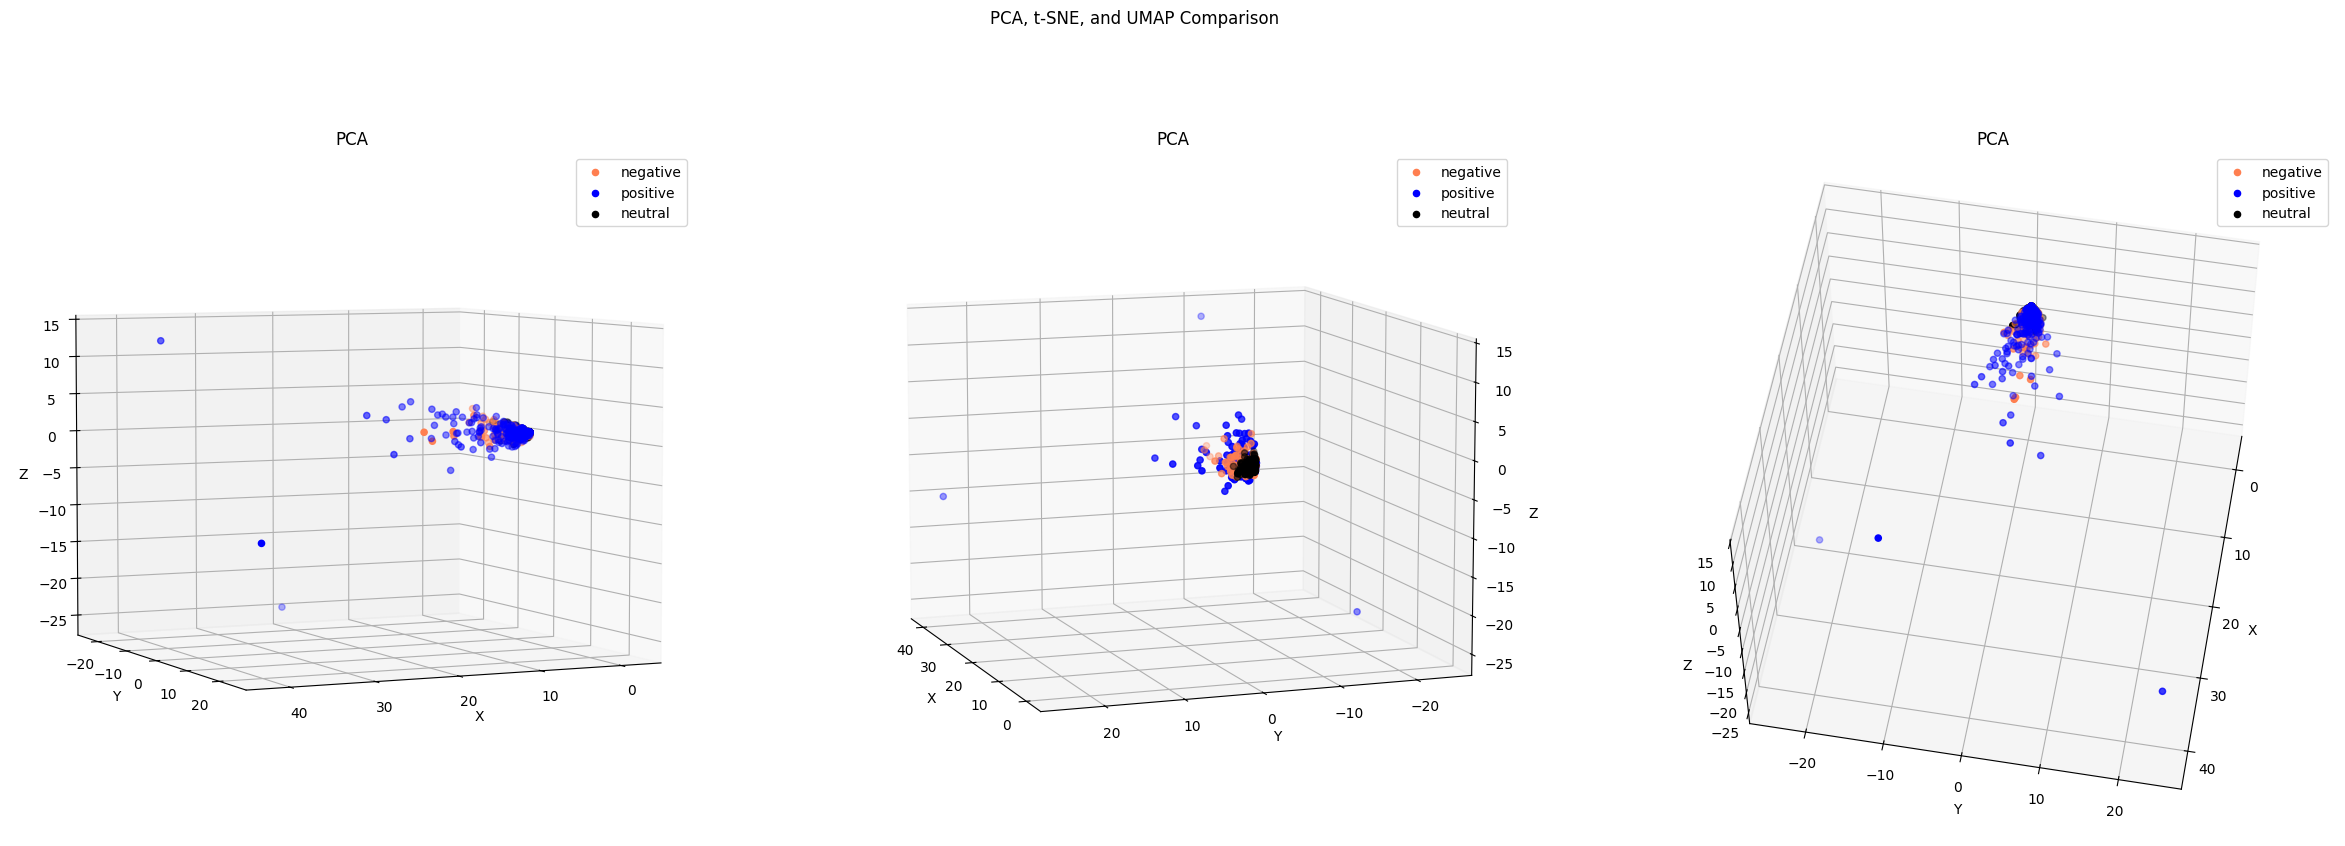

In [61]:
# Exercise 18

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt



reddit_pca_aug_3D = PCA(n_components=3).fit_transform(augmented_df.values)
reddit_tsne_aug_3D = TSNE(n_components=3).fit_transform(augmented_df.values)
reddit_umap_aug_3D = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = reddit_DF['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, subplot_kw={"projection": "3d"} , figsize=(30,10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')


def plot_scatter(ax, reddit_reduced, title):
    for c, category in zip(col, categories):
        xs = reddit_reduced[reddit_DF['sentiment_name'] == category].T[0]
        ys = reddit_reduced[reddit_DF['sentiment_name'] == category].T[1]
        zs = reddit_reduced[reddit_DF['sentiment_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

plot_scatter(axes[0], reddit_pca_aug_3D, 'PCA')
plot_scatter(axes[1], reddit_pca_aug_3D, 'PCA')
plot_scatter(axes[2], reddit_pca_aug_3D, 'PCA')

axes[0].view_init(elev=5, azim=65)
axes[1].view_init(elev=10, azim=160)
axes[2].view_init(elev=55, azim=10)

plt.show()

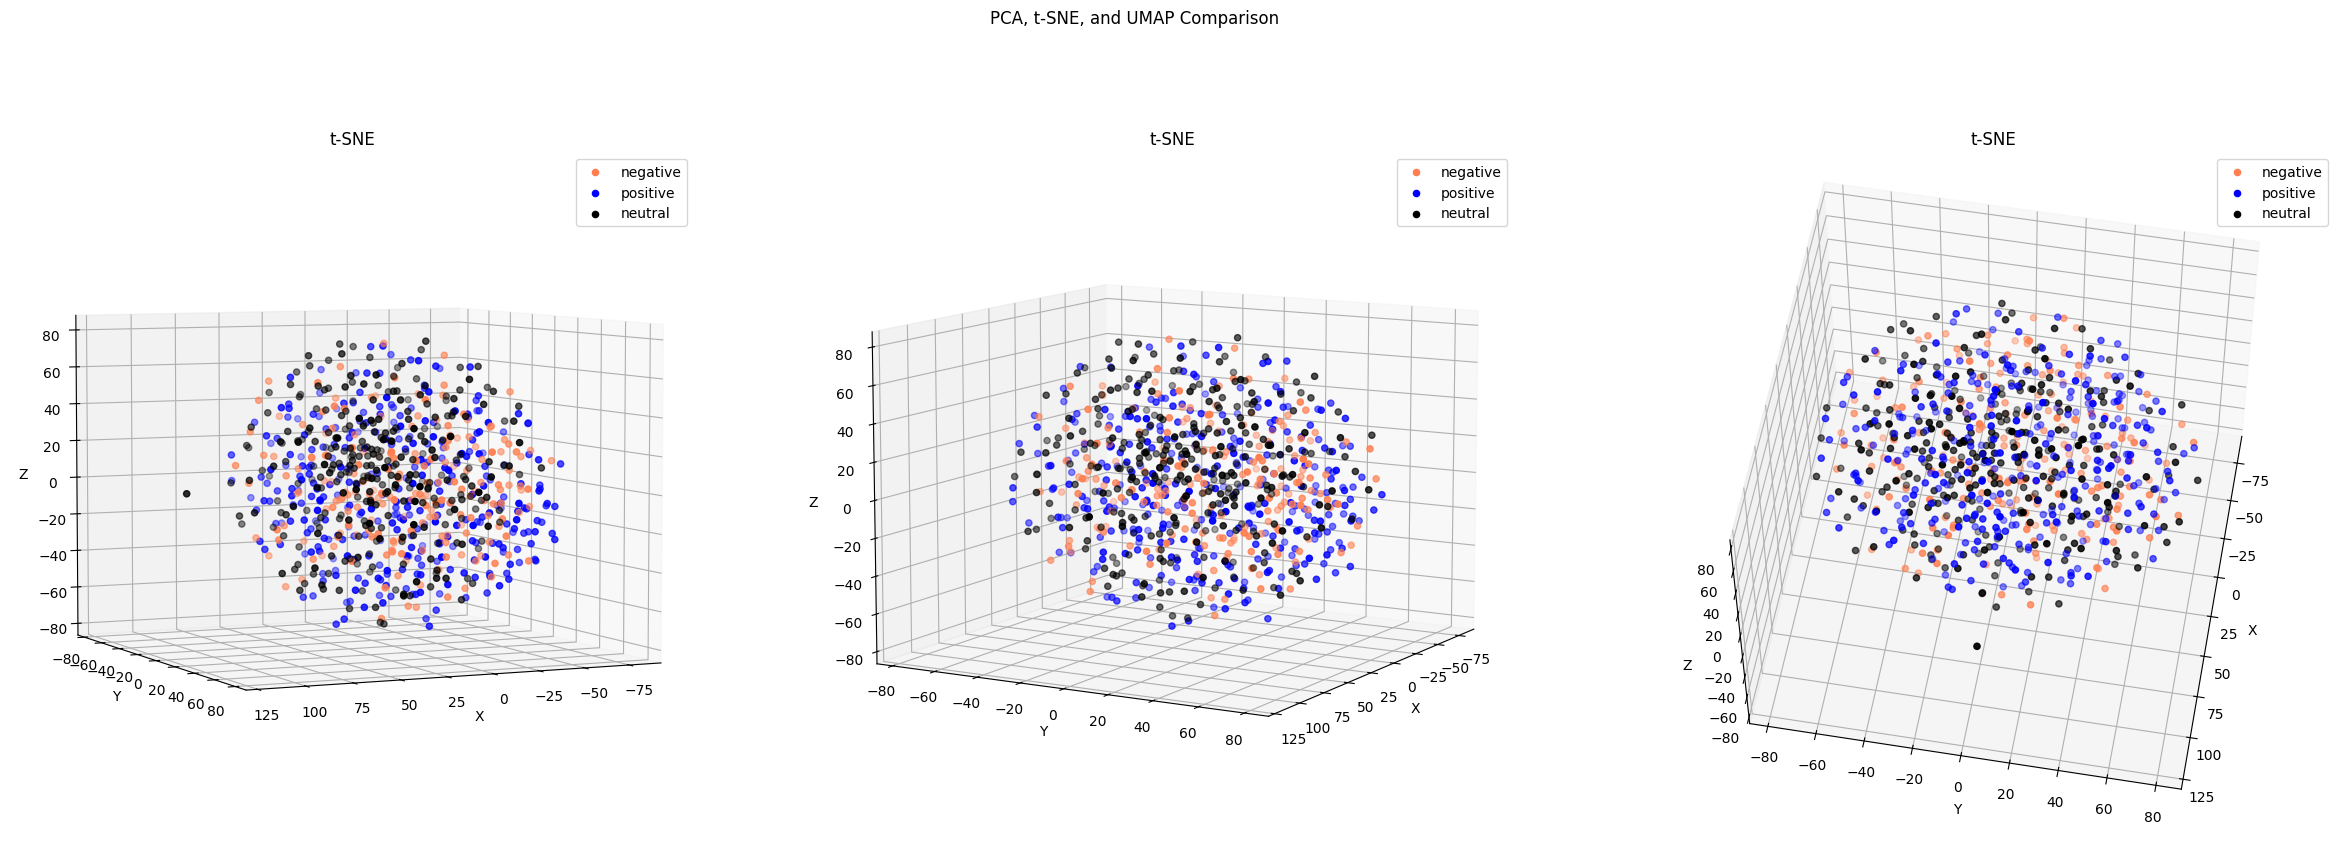

In [62]:
col = ['coral', 'blue', 'black', 'orange']
categories = reddit_DF['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, subplot_kw={"projection": "3d"} , figsize=(30,10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

plot_scatter(axes[0], reddit_tsne_aug_3D, 't-SNE')
plot_scatter(axes[1], reddit_tsne_aug_3D, 't-SNE')
plot_scatter(axes[2], reddit_tsne_aug_3D, 't-SNE')

axes[0].view_init(elev=5, azim=65)
axes[1].view_init(elev=10, azim=30)
axes[2].view_init(elev=55, azim=10)

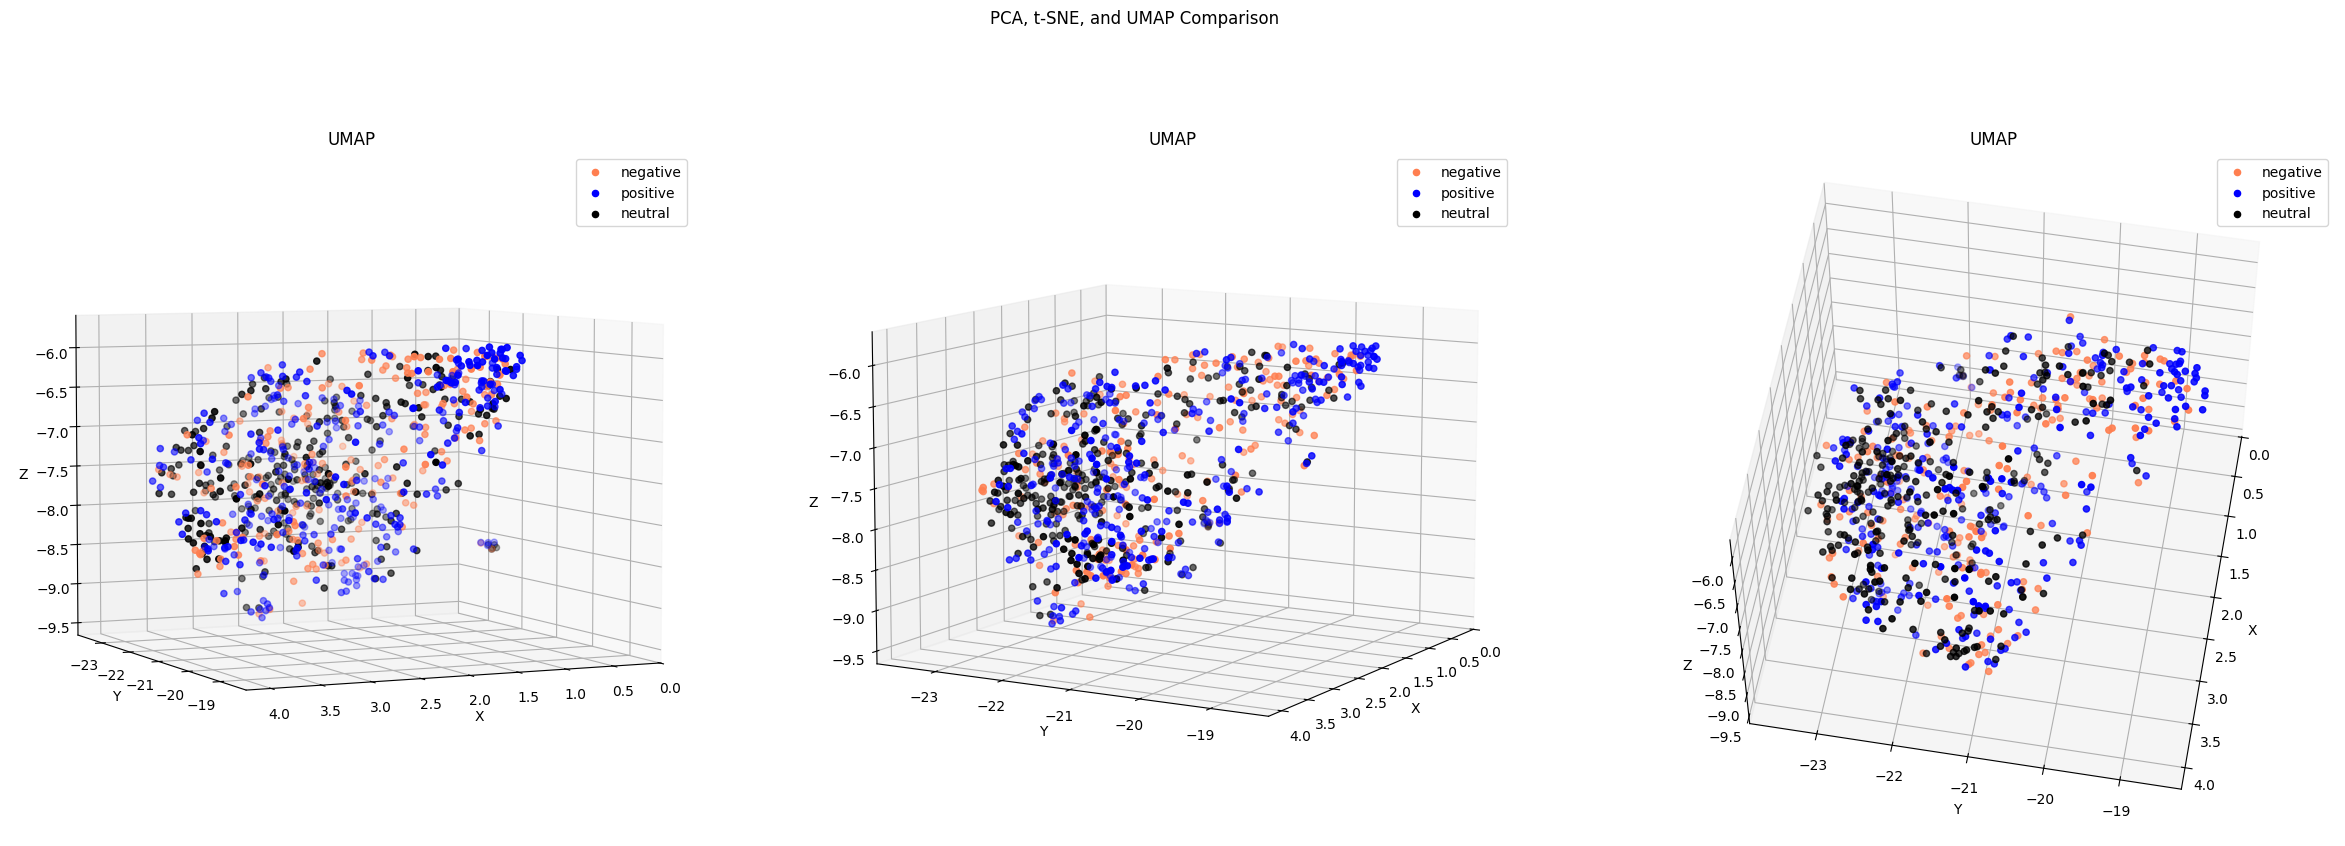

In [63]:
col = ['coral', 'blue', 'black', 'orange']
categories = reddit_DF['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, subplot_kw={"projection": "3d"} , figsize=(30,10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

plot_scatter(axes[0], reddit_umap_aug_3D, 'UMAP')
plot_scatter(axes[1], reddit_umap_aug_3D, 'UMAP')
plot_scatter(axes[2], reddit_umap_aug_3D, 'UMAP')

axes[0].view_init(elev=5, azim=65)
axes[1].view_init(elev=10, azim=30)
axes[2].view_init(elev=55, azim=10)

In [64]:
# Observations

#On PCA we can see that there is a big cluster in between -5 and 5 (Z-axis). This big cluster consists in all of the neutral data points, most negative data points, and a lot of positive data points. 

#The t-SNE, similar to the one in the master file, its a big cloud of data points and its difficult to observe any clusters. There is a single data point that is far away from the main cloud. 

#UMAP has a similar shape as t-SNE, with the exception that this cloud is not as condensed as the t-SNE. In this one we can observe the formation of some small clusters

#One thing all of them have in common is that they maintain a similar shape to their 2D counterparts. 

In [65]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(reddit_DF.sentiment)

LabelBinarizer()

In [66]:
reddit_DF['bin_sentiment'] = mlb.transform(reddit_DF['sentiment']).tolist()
reddit_DF[0:9]

,type,text,subjectivity,polarity,sentiment,label,sentiment_name,unigrams,tokenized_text,bin_sentiment
0,comment,Calls on retards,1.000000,-0.900000,-1.0,-1.0,negative,"[Calls, on, retards]","{retards, Calls, on}","[1, 0, 0]"
1,comment,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,0.0,positive,"[Stunt, as, in, like, why, did, they, even, ma...","{even, the, deal, about, they, it, a, make, St...","[0, 0, 1]"
2,comment,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{ticker., the, of, in, lots, Seeing, red}","[0, 1, 0]"
3,post,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{Hold, –, mph, innovation., years, water!, bla...","[0, 0, 1]"
4,comment,He didn’t say thank you.,0.000000,0.000000,0.0,-1.0,neutral,"[He, didn, ’, t, say, thank, you, .]","{He, thank, you., didn’t, say}","[0, 1, 0]"
5,comment,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,0.0,positive,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{to, Hoping, tonight,, wet, warm, in, puss, wi...","[0, 0, 1]"
6,comment,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,-1.0,negative,"[Trump, will, respond, to, china, increasing, ...","{adjust, see, even, quickly, fire, Trump, the,...","[1, 0, 0]"
7,comment,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,0.0,positive,"[Confirmed, not, a, trap, ., Its, been, like, ...","{Its, spread, trap., it, a, we, mouth, let, by...","[0, 0, 1]"
8,comment,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,1.0,positive,"[Am, I, the, only, one, seeing, the, cup, &, h...","{pivot, held, here?, Third, the, 52, I, folks....","[0, 0, 1]"


In [67]:
# Exercise 19

# Instead of 'category_name' I used 'sentiment_name' which functions similarly to category_name

mlb_Ex19 = preprocessing.LabelBinarizer()
mlb_Ex19.fit(reddit_DF.sentiment_name)
reddit_DF['bin_category_name'] = mlb_Ex19.transform(reddit_DF['sentiment_name']).tolist()
reddit_DF[0:9]

#This works for this exercise however its reduntant since its achieves the same as just using 'sentiment' 

,type,text,subjectivity,polarity,sentiment,label,sentiment_name,unigrams,tokenized_text,bin_sentiment,bin_category_name
0,comment,Calls on retards,1.000000,-0.900000,-1.0,-1.0,negative,"[Calls, on, retards]","{retards, Calls, on}","[1, 0, 0]","[1, 0, 0]"
1,comment,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,0.0,positive,"[Stunt, as, in, like, why, did, they, even, ma...","{even, the, deal, about, they, it, a, make, St...","[0, 0, 1]","[0, 0, 1]"
2,comment,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{ticker., the, of, in, lots, Seeing, red}","[0, 1, 0]","[0, 1, 0]"
3,post,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{Hold, –, mph, innovation., years, water!, bla...","[0, 0, 1]","[0, 0, 1]"
4,comment,He didn’t say thank you.,0.000000,0.000000,0.0,-1.0,neutral,"[He, didn, ’, t, say, thank, you, .]","{He, thank, you., didn’t, say}","[0, 1, 0]","[0, 1, 0]"
5,comment,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,0.0,positive,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{to, Hoping, tonight,, wet, warm, in, puss, wi...","[0, 0, 1]","[0, 0, 1]"
6,comment,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,-1.0,negative,"[Trump, will, respond, to, china, increasing, ...","{adjust, see, even, quickly, fire, Trump, the,...","[1, 0, 0]","[1, 0, 0]"
7,comment,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,0.0,positive,"[Confirmed, not, a, trap, ., Its, been, like, ...","{Its, spread, trap., it, a, we, mouth, let, by...","[0, 0, 1]","[0, 0, 1]"
8,comment,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,1.0,positive,"[Am, I, the, only, one, seeing, the, cup, &, h...","{pivot, held, here?, Third, the, 52, I, folks....","[0, 0, 1]","[0, 0, 1]"


In [68]:
#Data Exploration


document_to_transform_1 = []
random_record_1 = reddit_DF.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reddit_DF.iloc[50]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reddit_DF.iloc[100]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)


print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['>I did some digging and found they had a government contract listed on USASpending in 2021, so they’re not just vaporware.\r\n\r\nThis?  A contract for $3000?  That makes you want to compare them to Lockheed and Raytheon as a "Defense Contractor"?\r\n\r\n[]()']
["I think it's actually illegal to say how I feel"]


In [69]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [70]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.144338
Cosine Similarity using count bw 2 and 3: 0.104257
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim >

In [71]:
# Exercise 20

document_to_transform_25 = []
random_record_25 = reddit_DF.iloc[25]
random_record_25 = random_record_25['text']
document_to_transform_25.append(random_record_25)

document_to_transform_75 = []
random_record_75 = reddit_DF.iloc[75]
random_record_75 = random_record_75['text']
document_to_transform_75.append(random_record_75)

document_to_transform_105 = []
random_record_105 = reddit_DF.iloc[105]
random_record_105 = random_record_105['text']
document_to_transform_105.append(random_record_105)

document_vector_count_25 = count_vect.transform(document_to_transform_25)
document_vector_count_75 = count_vect.transform(document_to_transform_75)
document_vector_count_105 = count_vect.transform(document_to_transform_105)

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_50_150 = cosine_similarity(document_vector_count_25, document_vector_count_75, dense_output=True)
cos_sim_count_50_250 = cosine_similarity(document_vector_count_25, document_vector_count_105, dense_output=True)
cos_sim_count_150_250 = cosine_similarity(document_vector_count_75, document_vector_count_105, dense_output=True)

cos_sim_count_50_50 = cosine_similarity(document_vector_count_25, document_vector_count_25, dense_output=True)
cos_sim_count_150_150 = cosine_similarity(document_vector_count_75, document_vector_count_75, dense_output=True)
cos_sim_count_250_250 = cosine_similarity(document_vector_count_105, document_vector_count_105, dense_output=True)

# Print 
print("Cosine Similarity using count bw 25 and 75: %(x)f" %{"x":cos_sim_count_50_150})
print("Cosine Similarity using count bw 25 and 105: %(x)f" %{"x":cos_sim_count_50_250})
print("Cosine Similarity using count bw 75 and 105: %(x)f" %{"x":cos_sim_count_150_250})

print("Cosine Similarity using count bw 25 and 25: %(x)f" %{"x":cos_sim_count_50_50})
print("Cosine Similarity using count bw 75 and 75: %(x)f" %{"x":cos_sim_count_150_150})
print("Cosine Similarity using count bw 105 and 105: %(x)f" %{"x":cos_sim_count_250_250})

#The similarity of these files (25,75,105) is 0. Meaning that these text documents are completely unrelated from each other. This might have occurred because the text files vary a lot on size and may not have a lot of words to repeat. Also as we could see before, this data frame has a high sparcity, so this supports the cosine similarity of 0.


Cosine Similarity using count bw 25 and 75: 0.000000
Cosine Similarity using count bw 25 and 105: 0.000000
Cosine Similarity using count bw 75 and 105: 0.000000
Cosine Similarity using count bw 25 and 25: 1.000000
Cosine Similarity using count bw 75 and 75: 1.000000
Cosine Similarity using count bw 105 and 105: 1.000000


C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\2266497412.py:34: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\2266497412.py:35: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\2266497412.py:36: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Ferchis\AppData\Local\Temp\ipykernel_16232\2266497412.py:38: DeprecationWarning:

Conversion of an array with nd

In [72]:
#Model with only the document-term frequency data

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(reddit_DF[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, reddit_DF['sentiment'], test_size=0.3, random_state=42)

In [73]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5081967213114754

Classification Report:
               precision    recall  f1-score   support

    negative     0.5610    0.3433    0.4259        67
     neutral     0.7105    0.3140    0.4355        86
    positive     0.4485    0.8132    0.5781        91

    accuracy                         0.5082       244
   macro avg     0.5733    0.4901    0.4798       244
weighted avg     0.5717    0.5082    0.4861       244



In [76]:
# Exercise 21


X_train_augmented, X_test_augmented, y_train_augmented, y_test_augmented = train_test_split(augmented_df, reddit_DF['sentiment'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_augmented, y_train_augmented)


y_pred = nb_classifier.predict(X_test_augmented)


print("Accuracy:", accuracy_score(y_test_augmented, y_pred))
print("\nClassification Report:\n", classification_report(y_test_augmented, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5163934426229508

Classification Report:
               precision    recall  f1-score   support

    negative     0.5581    0.3582    0.4364        67
     neutral     0.7105    0.3140    0.4355        86
    positive     0.4601    0.8242    0.5906        91

    accuracy                         0.5164       244
   macro avg     0.5763    0.4988    0.4875       244
weighted avg     0.5753    0.5164    0.4936       244



#### Exercise 22

As we can see the accuracy of both augmented and non-augmented is very bad. Having said that there was an improvement of around 1%  on the augmented data. 

It seems like neutral sentiment was not affected by the augmented data. This may be because there were no patterns created for the neutral sentiment.

For negative sentiment, there a decrease in precision but an improvement in recall. 

For postive there was an improvement in precision but a decrease in recall. 

Overall, there is not much to discuss since they are very similar to each other.

In [78]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, reddit_DF['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5532786885245902

Classification Report:
               precision    recall  f1-score   support

    negative     0.3696    0.2537    0.3009        67
     neutral     0.6000    0.7674    0.6735        86
    positive     0.5909    0.5714    0.5810        91

    accuracy                         0.5533       244
   macro avg     0.5202    0.5309    0.5185       244
weighted avg     0.5333    0.5533    0.5367       244



#### Exercise 23

In this case Decision Tree was marginally better than Naive Bayes. 

While Naive Bayes usually works better with smaller models than Decision Tree, in this case the model may just be too small to properly use naive bayes. 

Since decision tree learn the features from the data directly, that may contribute to be slightly better. 


In [80]:
#Exercise 24

X_train_augmented, X_test_augmented, y_train_augmented, y_test_augmented = train_test_split(augmented_df, reddit_DF['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_augmented, y_train_augmented)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test_augmented)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test_augmented, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test_augmented, y_pred_dt, target_names=target_names, digits=4))

#In this case, decision tree is exactly the same as the augmented naive bayes. The reason for this is again, the size of the data, not allowing the data tree to have the depth it requires. 

Decision Tree Accuracy (TDM): 0.5163934426229508

Classification Report:
               precision    recall  f1-score   support

    negative     0.3400    0.2537    0.2906        67
     neutral     0.5701    0.7093    0.6321        86
    positive     0.5517    0.5275    0.5393        91

    accuracy                         0.5164       244
   macro avg     0.4873    0.4968    0.4873       244
weighted avg     0.5001    0.5164    0.5037       244



In [81]:
# Exercise 25

#In my opinion, none of these models are satisfactory. The accuracy of each one of them is too low (around 50%) and would fail to accurately predict future words.

#What I would recommend is to change the model and explore their accuracy. For example, we could investigate how accurate a gradient boosting (using XGBoost for example) or maybe even a logistic regression.


## Part 3 

### Classifier using TF-IDF features

In [ ]:

 
#Making the TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
reddit_Vect_TF = vectorizer.fit_transform(reddit_DF['text'])
words = vectorizer.get_feature_names_out()

# Convert the term-document matrix to a DataFrame
reddit_TF_tdm_df = pd.DataFrame(reddit_Vect_TF.toarray(), columns=terms, index=reddit_DF.index)

reddit_TF_tdm_df

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# Aggregate patterns in order to do the augment of features 

# Tokenize the sentences into sets of unique words
reddit_DF['tokenized_text'] = reddit_DF['text'].str.split().apply(set)

for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = reddit_DF['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_reddit_TF_tdm_df = pd.concat([reddit_TF_tdm_df, pattern_matrix], axis=1)

augmented_reddit_TF_tdm_df

,00,000,01378,02,027,03,06,08,10,100,...,call,american,after,still,love,lmao,point,lol,which,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from sklearn.naive_bayes import GaussianNB 

#I used GaussianNB because according to my research, its one of the best naive bayes variant if we are going to create IT-IDF features. The reason for this is that Gaussian assumes that each feature follows a normal distribution. Gaussian also can be used with positive and negative numbers, 

# Create a mapping from numerical labels to category names
category_mapping = dict(reddit_DF[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train_GAU, X_test_GAU, y_train_GAU, y_test_GAU = train_test_split(reddit_TF_tdm_df, reddit_DF['sentiment'], test_size=0.3, random_state=42)

X_train_GAU



,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
nb_gaussian = GaussianNB()
nb_gaussian.fit(X_train_GAU, y_train_GAU)

y_pred_GAU = nb_gaussian.predict(X_test_GAU)

# Print TF-IDF Naive Bayes with GaussianNB
print("Accuracy with TF-IDF (non-augmented):", accuracy_score(y_test_GAU, y_pred_GAU))
print("\nClassification Report:\n", classification_report(y_test_GAU, y_pred_GAU, target_names=target_names, digits=4))

Accuracy with TF-IDF (non-augmented): 0.5655737704918032

Classification Report:
               precision    recall  f1-score   support

    negative     0.5000    0.2985    0.3738        67
     neutral     0.8837    0.4419    0.5891        86
    positive     0.4969    0.8791    0.6349        91

    accuracy                         0.5656       244
   macro avg     0.6269    0.5398    0.5326       244
weighted avg     0.6341    0.5656    0.5471       244



In [93]:
X_train_GAU_augmented, X_test_GAU_augmented, y_train_GAU_augmented, y_test_GAU_augmented = train_test_split(augmented_reddit_TF_tdm_df, reddit_DF['sentiment'], test_size=0.3, random_state=42)

nb_gaussian_augmented = GaussianNB()
nb_gaussian_augmented.fit(X_train_GAU_augmented, y_train_GAU_augmented)

y_pred_GAU_augmented = nb_gaussian_augmented.predict(X_test_GAU_augmented)

# Print augmented TF-IDF Naive Bayes with GaussianNB
print("Accuracy with TF-IDF (augmented):", accuracy_score(y_test_GAU_augmented, y_pred_GAU_augmented))
print("\nClassification Report:\n", classification_report(y_test_GAU_augmented, y_pred_GAU_augmented, target_names=target_names, digits=4))

Accuracy with TF-IDF (augmented): 0.5737704918032787

Classification Report:
               precision    recall  f1-score   support

    negative     0.5263    0.2985    0.3810        67
     neutral     0.8837    0.4419    0.5891        86
    positive     0.5031    0.9011    0.6457        91

    accuracy                         0.5738       244
   macro avg     0.6377    0.5472    0.5386       244
weighted avg     0.6436    0.5738    0.5531       244



### Classifier using word frequency features

In [ ]:


from sklearn.feature_extraction.text import CountVectorizer

count_vect_P3 = CountVectorizer()
reddit_DF_P3 = count_vect_P3.fit_transform(reddit_DF['text']) 
terms_P3 = count_vect_P3.get_feature_names_out()




# Convert the term-document matrix to a DataFrame
reddit_tdm_df = pd.DataFrame(reddit_DF_P3.toarray(), columns=terms, index=reddit_DF.index)

reddit_tdm_df


,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Aggregate patterns in order to do the augment of features 

# Tokenize the sentences into sets of unique words
reddit_DF['tokenized_text'] = reddit_DF['text'].str.split().apply(set)

for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = reddit_DF['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_reddit_df_P3 = pd.concat([reddit_tdm_df, pattern_matrix], axis=1)

augmented_reddit_df_P3

,00,000,01378,02,027,03,06,08,10,100,...,call,american,after,still,love,lmao,point,lol,which,time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
from sklearn.naive_bayes import MultinomialNB

# Create a mapping from numerical labels to category names
category_mapping = dict(reddit_DF[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train_P3, X_test_P3, y_train_P3, y_test_P3 = train_test_split(reddit_tdm_df, reddit_DF['sentiment'], test_size=0.3, random_state=42)

X_train_P3


,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_P3, y_train_P3)

# Make predictions on the test set
y_pred_P3 = nb_classifier.predict(X_test_P3)

# Evaluate the classifier
print("Accuracy with word frequency (Non-augmented):", accuracy_score(y_test_P3, y_pred_P3))
print("\nClassification Report:\n", classification_report(y_test_P3, y_pred_P3, target_names=target_names, digits=4))

Accuracy with word frequency (Non-augmented): 0.5081967213114754

Classification Report:
               precision    recall  f1-score   support

    negative     0.5610    0.3433    0.4259        67
     neutral     0.7105    0.3140    0.4355        86
    positive     0.4485    0.8132    0.5781        91

    accuracy                         0.5082       244
   macro avg     0.5733    0.4901    0.4798       244
weighted avg     0.5717    0.5082    0.4861       244



In [91]:
X_train_P3_augmented, X_test_P3_augmented, y_train_P3_augmented, y_test_P3_augmented = train_test_split(augmented_reddit_df_P3, reddit_DF['sentiment'], test_size=0.3, random_state=42)

nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_P3_augmented, y_train_P3_augmented)

# Make predictions on the test set
y_pred_augmented = nb_classifier_aug.predict(X_test_P3_augmented)

# Evaluate the classifier
print("Accuracy with word frequency (Augmented):", accuracy_score(y_test_P3_augmented, y_pred_augmented))
print("\nClassification Report:\n", classification_report(y_test_P3_augmented, y_pred_augmented, target_names=target_names, digits=4))

Accuracy with word frequency (Augmented): 0.5163934426229508

Classification Report:
               precision    recall  f1-score   support

    negative     0.5581    0.3582    0.4364        67
     neutral     0.7105    0.3140    0.4355        86
    positive     0.4601    0.8242    0.5906        91

    accuracy                         0.5164       244
   macro avg     0.5763    0.4988    0.4875       244
weighted avg     0.5753    0.5164    0.4936       244



### Observations

When using the augmented data there is always an improvement in the accuracy. In both cases, whether it was word frequency or TF-IDF, the accuracy slightly improved. In this cases, accuracy improved by 1%.

The most accuracate model with around 57% accuracy was TF-IDF with augmented data and Gaussian naive Bayes. 

Compared with word frequency, TF-IDF always showed a better accuracy. On non-augmented dataframe, the accuracy from word frequency was 50.82% while the accuracy on TF-IDF was 56.56%. On augmented data, word frequency achieved a 51.64% while TF achieved a 57.37% accuracy.

Just like in the exercises, the netrual sentiment showed no changes between augmented and non-augmented. However it did behaved differently with TF-IDF, showing an improvement in precision and recall.

The negative sentiment however, was more precise and better at recall in word frequency compared to TF-IDF. Showing around a 5% decrease in TF-IDF. 

Positive showed a higher improvement in TD-IDF just like neutral. 

## Part 4 Improvements on the preprocessing data

Something that I noticed in the master file is when we removed the top 5% of words and bottom 1%, some words that were important were removed, as well as not all the irrelevant words were removed. For example, the word 'muscle' and 'genetic' in the sci.med document were removed because they were in the top 5% while the bottom 1% still did not included all the words with a frequency of 1. Therefore using top 5% is taking out important words, while the bottom 1% is still keeping unimportant ones. I would suggest to adjust this metric, remove all words with a frequency of 1 and words with a frequency of over 1000. 

When we did the finding frequent patterns, we used a minSup of 9 without checking if any other minSup was more accurate. We could have experimented with the minSup first in order to find the most accurate one. 

There were some parts where the code was inefficient or there was no used for it. For example, in the master file in part 6 Data Exploration, we binarize the code document_vector_count_1 into the file document_vector_count_1_bin but then we did not do anything with these. document_vector_count_1_bin was never printed or used, so while I understand you wanted to show us how to binarize something, the fact it was never used just made it feel a bit redundant. 

Also we always used the analyzer inside of CountVectorizer, I think it would have been interesting to create and actually used one. As of now, since we created it but didnt used it only made that part feel redundant again.

